In [ ]:
options(repr.plot.width = 8 , repr.plot.height = 5)

# Lecture 3: Advanced data transformations and pipelines

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Use the skills that we learned last week to do advanced data analysis
* Construct pipelines of data transformations
    
This lecture note corresponds to Chapters 4 and 5 of your book.
</div>

In [ ]:
# packages we will be using in today's lecture:
library(tidyverse)  # always!
# install these packages if needed
# install.packages('nycflights13')
# install.packages('babynames')
library(nycflights13)
library(babynames)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Review of week 2
Last lecture we learned how to alter the rows and columns of a dataframe:
- `filter()` to keep certain rows that satisfy logical conditions.
- `arrange()` to sort rows according to certain column values.
- `distinct()` to keep only rows that are distinct on some combination of columns.
- `select()` to drop/rename/rearrange columns
- `group_by()` to tell R how your data are grouped
- `summarize()` to create summary tables of your (grouped) data
- `top_n()` to get the top n records for the given column values

## Revisiting the pipe (`%>%`) operator

![pipes](https://i0.wp.com/www.rforecology.com/pipes_image0.png?zoom=2&w=578&ssl=1)

`%>%` (pronounced: "pipe") works by taking the **output** from the left-hand side, and feeding it in as the **input** on the right-hand side:

<div style="margin: 0 auto; padding: 50px; font-size: 36px">
    <code style="background: lightgreen; padding: 5px">output</code>
    <code> %&gt;% </code>
    <code>function(<code style="background: lightgreen; padding: 5px">input</code>, args...)</code>
</div>

## Practice forming pipelines


### Using the `n()`, `count()`, and `n_distinct()` functions

Find the total count of flights from each airport


In [ ]:
## using group_by, summarize and n


origin,total
<chr>,<int>
EWR,120835
JFK,111279
LGA,104662


### group_by revisited

"When you summarize a tibble grouped by more than one variable, each summary peels off the last group"


In [ ]:
flights %>%
group_by(year, month, day) %>%
summarize(n = n()) %>%
summarize(sum = sum(n)) %>%
summarize(total = sum(sum))

In [ ]:
flights %>%
group_by(year, month, day) %>%
group_vars

To remove the warning you can explictly add the `.groups=drop` to keep it you would add `.groups=keep`

In [ ]:
flights %>%
group_by(year, month, day) %>%
summarize(n = n(), .groups='keep') %>%
print

# A tibble: 365 × 4
# Groups:   year, month, day [365]
    year month   day     n
   <int> <int> <int> <int>
 1  2013     1     1   842
 2  2013     1     2   943
 3  2013     1     3   914
 4  2013     1     4   915
 5  2013     1     5   720
 6  2013     1     6   832
 7  2013     1     7   933
 8  2013     1     8   899
 9  2013     1     9   902
10  2013     1    10   932
# ℹ 355 more rows


## Using `count` to get the same result

In [ ]:
# using count


origin,n
<chr>,<int>
EWR,120835
JFK,111279
LGA,104662


In [ ]:
# using count with name = 'total' and sort = T

In [ ]:
# Find the total number of unique carriers

flights$carrier %>% unique %>% length

In [ ]:
# using n_distinct


## &#129300; Quiz
In the flights dataset, the number of aircraft (tailnum) that are used by multiple carriers is:

1. 20
2. 19
3. 18
4. 17

In [ ]:
# you can use some of the functions like distinct, count, filter


### Stepping up the complexity
Let's find the most delayed flight (highest departure delay) for each day of the year:
    
    # A tibble: 370 × 19
    # Groups:   year, month, day [365]
        year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
       <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
     1  2013     1     1      848       1835     853    1001    1950     851 MQ     
     2  2013     1     2     2131       1512     379    2340    1741     359 UA     

In [ ]:
# most delayed flight for each day

What about the *second-most* delayed flight for each day?

    # A tibble: 369 × 20
    # Groups:   year, month, day [360]
        year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
       <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
     1  2013     1     1     2343       1724     379     314    1938     456 EV     
     2  2013     1     2     1607       1030     337    2003    1355     368 AA     
     3  2013     1     3     2008       1540     268    2339    1909     270 DL     

To do this question (easily) we will use a new function, `min_rank()` (see Chapter 15 of the reading). This function takes a vector of numbers and returns their rank:

In [ ]:
min_rank(c(5, 1, 3, 10, 15))

[1] 3 1 2 4 5

In [ ]:
# find the second-most delayed flight of the year

If I create a list of the ten most (departure-)delayed flights for each day of the year, which carrier appears most frequently on that list?


In [ ]:
# most commonly delayed carrier

### What about the proportion of delayed flights?



In [ ]:
# proportion of delayed flights for each origin


`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


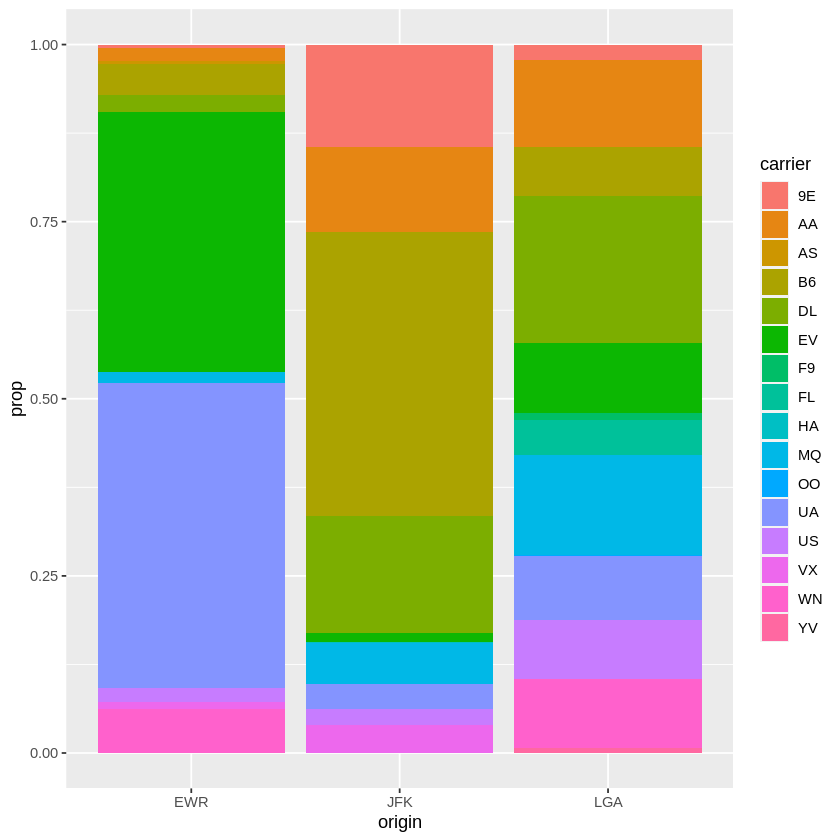

### Question

Just because the count of delayed flights is higher for a particular carrier, can we conclude that we should avoid booking tickets through that carrier?

Why or why not?



## And now for something completely different
![babies](https://images.ctfassets.net/cnu0m8re1exe/PYLeBWr2QDF5yjyZwB5Iq/7509e49d1d621860c1d4c484243c23db/shutterstock_189429203.jpg)

The US Social Security Administration keeps records of every child born in the United States each year. Using this information, they have produced a [public database](https://www.ssa.gov/oact/babynames/) of name frequencies in the U.S.

In [ ]:
head(babynames)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


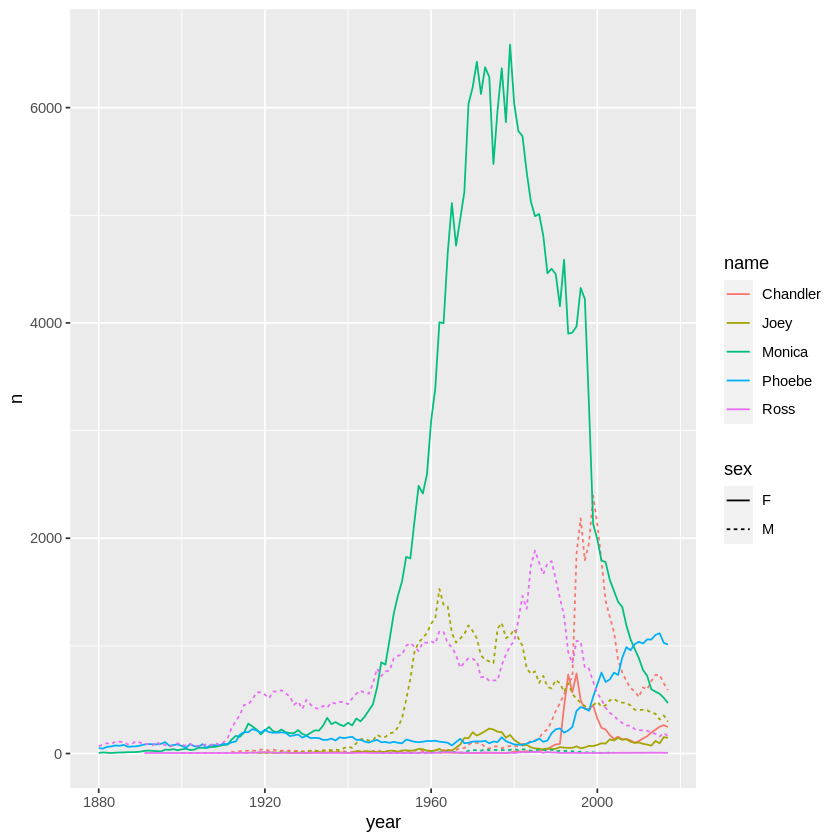

In [ ]:
# Plot the trend of the following names 'Chandler', 'Joey', 'Monica', 'Phoebe', 'Ross' over time


### Glimpse into strings
We will deep dive into strings after midterm, but for now, let us understand some basic functions that we can apply to strings
* str_sub()
* length(str)

In [ ]:
# Multiple ways of initializing a string; both single and double quotes work
my_str1 = "text manipulation is fun"
print(my_str1)
my_str2 = 'text manipulation is fun'
print(my_str2)

[1] "text manipulation is fun"
[1] "text manipulation is fun"
 num 123


In [ ]:
# to find str length
str_length(my_str1)

[1] 24


# What sum of names end in 'a'?

To tackle this problem, we're going to need a way to extract the last character of a name using `str_sub`

In [ ]:
str_sub('Alejandro', -1)

[1] "o"

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


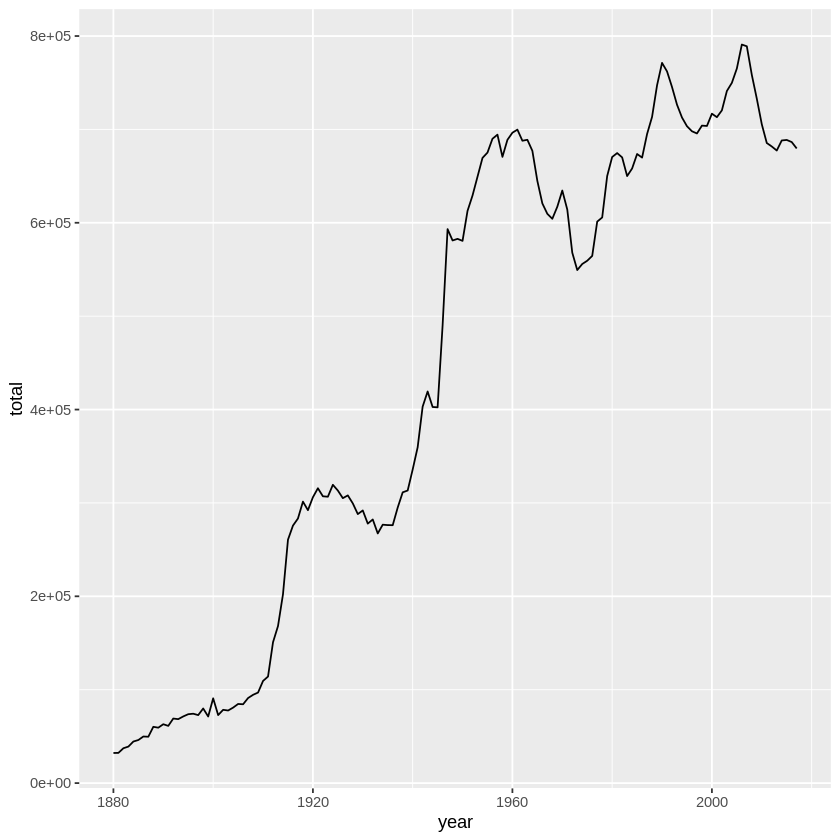

In [ ]:
# What is the count of names ending in 'a' over time?


## &#129300; Quiz
# How many female names end in 'a'?
* 497580
* 469991
* more than 500000
* < 10000

### Using `word` function

In [ ]:

word('October 5th 1990 something else')

[1] "October"

### Back to mpg dataset

Let us find the proportion of cyl across the various manufacturers


In [ ]:
mpg %>% print

# A tibble: 234 × 11
   manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
   <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
 1 audi         a4           1.8  1999     4 auto… f        18    29 p     comp…
 2 audi         a4           1.8  1999     4 manu… f        21    29 p     comp…
 3 audi         a4           2    2008     4 manu… f        20    31 p     comp…
 4 audi         a4           2    2008     4 auto… f        21    30 p     comp…
 5 audi         a4           2.8  1999     6 auto… f        16    26 p     comp…
 6 audi         a4           2.8  1999     6 manu… f        18    26 p     comp…
 7 audi         a4           3.1  2008     6 auto… f        18    27 p     comp…
 8 audi         a4 quattro   1.8  1999     4 manu… 4        18    26 p     comp…
 9 audi         a4 quattro   1.8  1999     4 auto… 4        16    25 p     comp…
10 audi         a4 quattro   2    2008     4 manu… 4        20    28 p     comp…
# ℹ 224

In [ ]:
data <-
    mpg %>% group_by(manufacturer, cyl) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    filter(manufacturer %in% c('audi', 'chevrolet', 'dodge'))

data %>% print

`summarise()` has grouped output by 'manufacturer'. You can override using the
`.groups` argument.


# A tibble: 9 × 4
# Groups:   manufacturer [3]
  manufacturer   cyl count   prop
  <chr>        <int> <int>  <dbl>
1 audi             4     8 0.444 
2 audi             6     9 0.5   
3 audi             8     1 0.0556
4 chevrolet        4     2 0.105 
5 chevrolet        6     3 0.158 
6 chevrolet        8    14 0.737 
7 dodge            4     1 0.0270
8 dodge            6    15 0.405 
9 dodge            8    21 0.568 


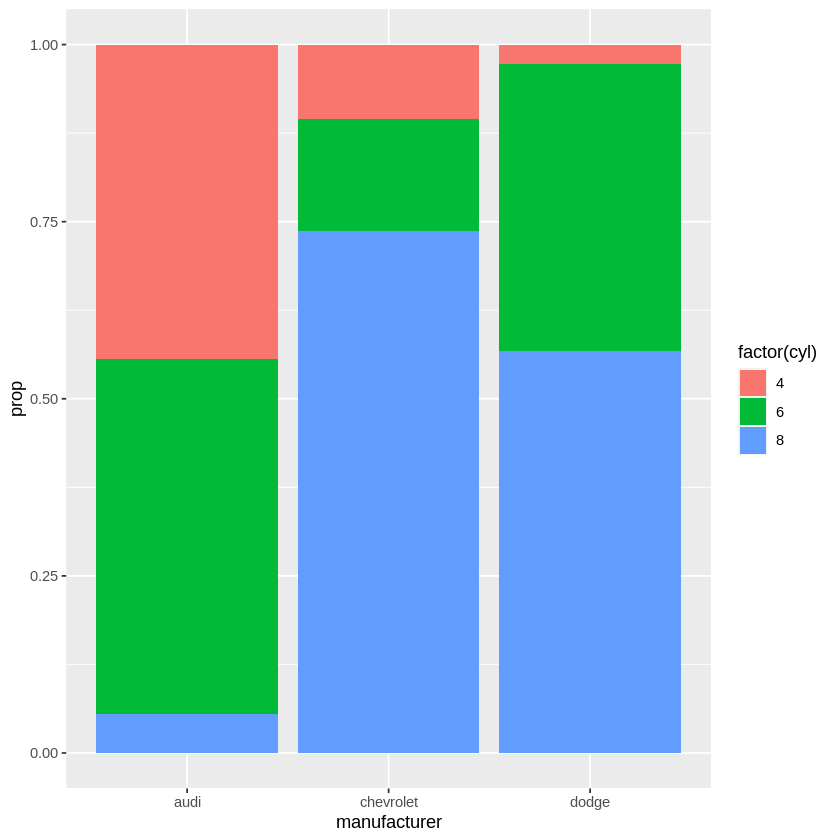

In [ ]:
ggplot(data, aes(x = manufacturer, y = prop, fill = factor(cyl))) +
  geom_bar(stat='identity')

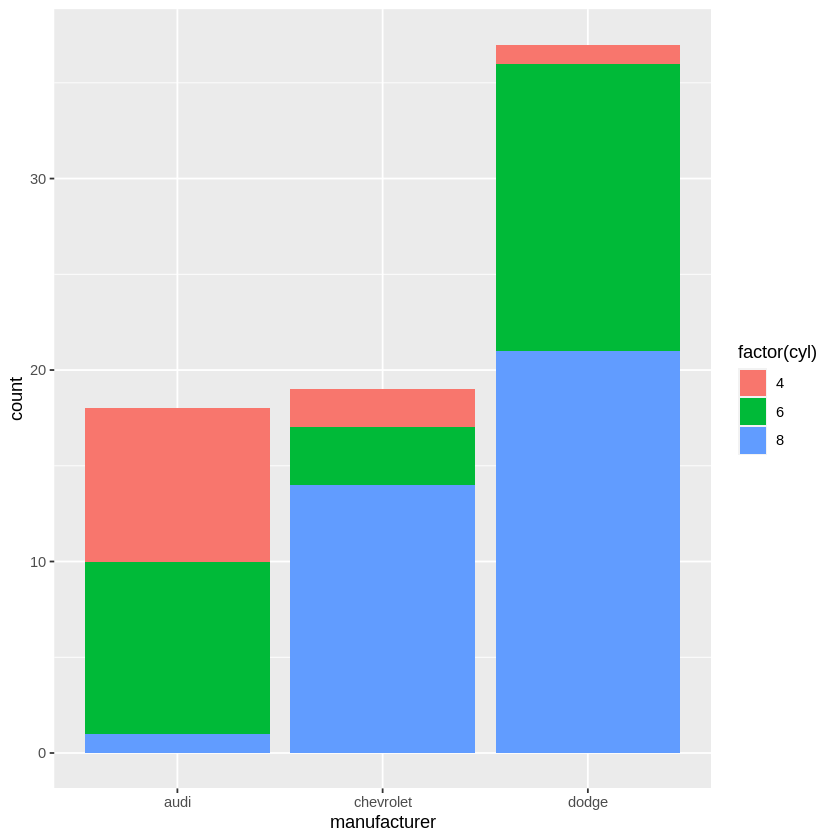

In [ ]:
mpg %>% filter(manufacturer %in% c('audi', 'chevrolet', 'dodge')) %>%
        ggplot(aes(x = manufacturer, fill = factor(cyl))) +
          geom_bar()

### stat = 'identity'
When you set stat = "identity", you are telling ggplot2 to use the actual values from your data to determine the heights of the bars. Otherwise, the default is stat = 'count'. In the default case, ggplot2 will automatically calculate the count (frequency) of each category and use these counts to determine the heights of the bars.

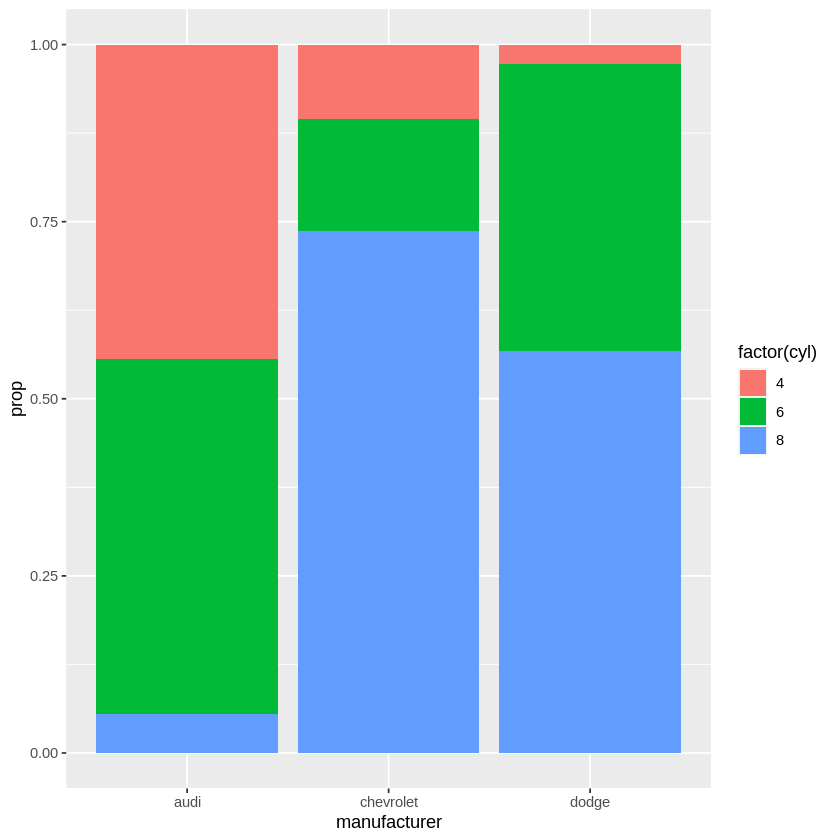

In [ ]:
ggplot(data, aes(x = manufacturer, y = prop, fill = factor(cyl))) +
  geom_col()